In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop


In [ ]:
val_batch = 10
train_batch = 20
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.4,
        zoom_range=0.3,
        validation_split=0.4,
        horizontal_flip=True,
        )
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/PIAIC/flower-recognition',
        target_size=(180, 180),
        batch_size=train_batch,
        class_mode='categorical',
        subset = 'training',
        shuffle = True
        )
validation_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/PIAIC/flower-recognition',
        target_size=(180, 180),
        batch_size=val_batch,
        class_mode='categorical',
        subset = 'validation',
        shuffle= True)


Found 2597 images belonging to 5 classes.
Found 1726 images belonging to 5 classes.


In [ ]:
len(validation_generator[172])

2

In [ ]:
validation_generator[172][1]

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
validation_generator.labels

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [ ]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
len(train_generator[129][1])

17

In [ ]:
#MOdels with COnv2D and Maxpooling
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

In [ ]:
with tf.device('/device:GPU:0'):
  result = model.fit(
          train_generator,
          steps_per_epoch=30,
          epochs=50,
          validation_data=validation_generator,
          validation_steps=30)

Epoch 1/50
30/30 [==============================] - 10s 308ms/step - loss: 1.5937 - accuracy: 0.2333 - val_loss: 1.4472 - val_accuracy: 0.3700
Epoch 2/50
30/30 [==============================] - 9s 301ms/step - loss: 1.3442 - accuracy: 0.4202 - val_loss: 1.1403 - val_accuracy: 0.4800
Epoch 3/50
30/30 [==============================] - 9s 301ms/step - loss: 1.2124 - accuracy: 0.4726 - val_loss: 1.2842 - val_accuracy: 0.4467
Epoch 4/50
30/30 [==============================] - 9s 299ms/step - loss: 1.1834 - accuracy: 0.5134 - val_loss: 1.1524 - val_accuracy: 0.5667
Epoch 5/50
30/30 [==============================] - 9s 302ms/step - loss: 1.1379 - accuracy: 0.5337 - val_loss: 1.0340 - val_accuracy: 0.5800
Epoch 6/50
30/30 [==============================] - 9s 312ms/step - loss: 1.2468 - accuracy: 0.4984 - val_loss: 1.0696 - val_accuracy: 0.5667
Epoch 7/50
30/30 [==============================] - 9s 297ms/step - loss: 1.0996 - accuracy: 0.5564 - val_loss: 1.1412 - val_accuracy: 0.5233
Epoch

In [ ]:
model.evaluate(validation_generator)

173/173 [==============================] - 19s 108ms/step - loss: 1.4870 - accuracy: 0.5556


[1.4869943857192993, 0.5556199550628662]

In [ ]:
x = result.history.keys()
x

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

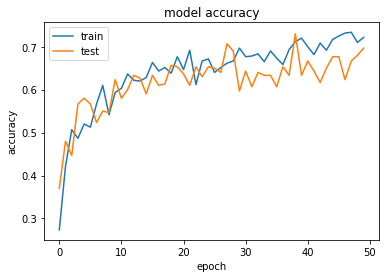

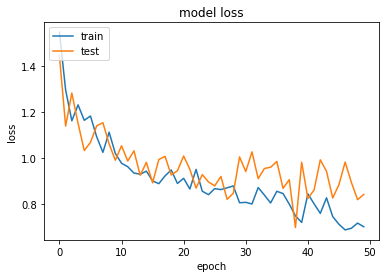

In [ ]:

# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred1 = model.predict(validation_generator)

In [ ]:
y_pred1.shape

(1726, 5)

In [ ]:
list1 = []
for i in range(0,len(validation_generator)):
  for j in range(0,val_batch):
    try:
      list1.append(validation_generator[i][1][j].tolist())
    except:
      break

In [ ]:
np.argmax(y_pred1, axis=1)[0:30]

array([3, 0, 1, 2, 4, 0, 0, 0, 3, 1, 0, 4, 1, 4, 1, 4, 3, 0, 2, 4, 0, 2,
       0, 3, 3, 1, 0, 2, 0, 1])

In [ ]:
np.argmax(list1[0:30],axis=1)

array([2, 4, 1, 1, 4, 4, 2, 1, 1, 1, 2, 4, 1, 4, 3, 4, 0, 3, 2, 4, 3, 1,
       4, 3, 4, 2, 1, 0, 0, 0])

In [ ]:
# plt.figure(figsize = (20,20))
# for i in range(10):
#     img = train_datagen[600*i][0]
#     plt.subplot(1,5,i+1)
#     plt.imshow(img)
#     plt.axis("off")
#     plt.title(train_datagen[600*i][1])
# plt.show()